In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 200)

# 训练集

In [2]:
train4 = pd.read_csv('train4.csv')

In [3]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332956 entries, 0 to 332955
Data columns (total 27 columns):
service_type              332956 non-null int64
is_mix_service            332956 non-null int64
online_time               332956 non-null int64
1_total_fee               332956 non-null float64
2_total_fee               332956 non-null float64
3_total_fee               332956 non-null float64
4_total_fee               332956 non-null float64
month_traffic             332956 non-null float64
many_over_bill            332956 non-null int64
contract_type             332956 non-null int64
contract_time             332956 non-null int64
is_promise_low_consume    332956 non-null int64
net_service               332956 non-null int64
pay_times                 332956 non-null int64
pay_num                   332956 non-null float64
last_month_traffic        332956 non-null float64
local_trafffic_month      332956 non-null float64
local_caller_time         332956 non-null float64
service

In [4]:
train4_id = train4[['user_id']]
train4_y = train4[['current_service']]
train4_x = train4.drop(['service_type', 'user_id', 'current_service'], axis=1)
train4_feature = train4_x.columns

In [5]:
from sklearn.preprocessing import LabelEncoder
le4 = LabelEncoder()
train4_y_le = le4.fit_transform(train4_y['current_service'])

In [6]:
train4_x_stand = train4_x

In [7]:
train4_tra_x = train4_x_stand[1:int(4/5*len(train4_x_stand))]
train4_val_x = train4_x_stand[int(4/5*len(train4_x_stand)):]

In [8]:
train4_tra_y = train4_y_le[1:int(4/5*len(train4_x_stand))]
train4_val_y = train4_y_le[int(4/5*len(train4_x_stand)):]

In [9]:
def XGB():
    clf = xgb.XGBClassifier(max_depth=12, learning_rate=0.1,
                            n_estimators=752, silent=True,
                            objective="multi:softmax",
                            nthread=4, gamma=0,
                            max_delta_step=0, subsample=1, colsample_bytree=0.9, colsample_bylevel=0.9,
                            reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
                            base_score=0.5, seed=2018, missing=None,num_class=11)
    return clf

In [10]:
xgb4 = XGB()
xgb4.fit(train4_tra_x, train4_tra_y, eval_set=[(train4_val_x, train4_val_y)], verbose=1)

[0]	validation_0-merror:0.186839
[1]	validation_0-merror:0.169044
[2]	validation_0-merror:0.160395
[3]	validation_0-merror:0.1561
[4]	validation_0-merror:0.153937
[5]	validation_0-merror:0.152331
[6]	validation_0-merror:0.151024
[7]	validation_0-merror:0.148606
[8]	validation_0-merror:0.148081
[9]	validation_0-merror:0.146249
[10]	validation_0-merror:0.145168
[11]	validation_0-merror:0.144522
[12]	validation_0-merror:0.143516
[13]	validation_0-merror:0.14278
[14]	validation_0-merror:0.142104
[15]	validation_0-merror:0.141428
[16]	validation_0-merror:0.140437
[17]	validation_0-merror:0.140257
[18]	validation_0-merror:0.139281
[19]	validation_0-merror:0.13832
[20]	validation_0-merror:0.137719
[21]	validation_0-merror:0.137059
[22]	validation_0-merror:0.136698
[23]	validation_0-merror:0.135797
[24]	validation_0-merror:0.135317
[25]	validation_0-merror:0.134671
[26]	validation_0-merror:0.13407
[27]	validation_0-merror:0.133439
[28]	validation_0-merror:0.133289
[29]	validation_0-merror:0.13

KeyboardInterrupt: 

In [26]:
params={'booster':'gbtree', 
        'objective': 'multi:softmax', 
        'eval_metric':'auc', 
        'gamma':0.1, 
        'min_child_weight':1.1,
        'max_depth':5,
        'lambda':10,
        'subsample':0.7,
        'colsample_bytree':0.7,
        'colsample_bylevel':0.7,
        'eta': 0.01,
        'tree_method':'exact',
        'seed':0,
        'nthread':12,
        'num_class':11}

In [9]:
dataset4 = xgb.DMatrix(train4_tra_x, label=train4_tra_y)
val_data4 = xgb.DMatrix(train4_val_x)

In [34]:
xgb4 = xgb.XGBClassifier(objective='multi:softmax', silent=False, n_jobs=2, n_estimator=200, gamma=0.1, verbose=1)

In [19]:
xgb4.fit(train4_tra_x, train4_tra_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimator=200,
       n_estimators=100, n_jobs=2, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1, verbose=1)

In [72]:
val_xgb4 = xgb4.predict(train4_val_x)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [73]:
val_xgb4 = le4.inverse_transform(val_xgb4)
validation4 = train4_id[int(4/5*len(train4_x_stand)):]
validation4['predict_service'] = val_xgb4

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
val_y4 = train4_id[int(4/5*len(train4_x_stand)):]
val_y4['current_service'] = le4.inverse_transform(train4_val_y)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.7970线上 去掉total_pay

0.734 有total_pay

In [75]:
score(val_y4, validation4)

0.9346548492645891 89950166
0.7870439314966493 99999830
0.8916945335426193 89950167
0.95042194092827 89950168
0.7667031763417306 99999827
0.8015380065069506 99999826
0.8430037597805101 99999828
0.9485232067510548 99999825
0.7823631624674197 89016253
0.9420877904832166 89016252
0.7587867116032738 89016259


0.7313081208868655

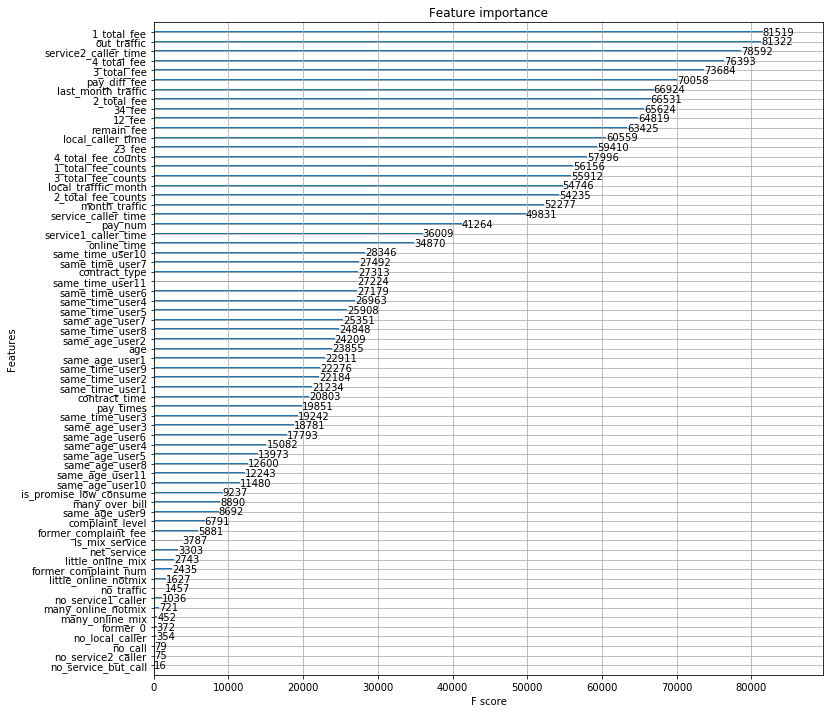

In [76]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax2 = plt.subplots(1,1,figsize=(12, 12))
plot_importance(booster=xgb4, ax=ax2)
plt.show()

# 测试集

In [83]:
test4 = pd.read_csv('test4_featured.csv')
test1 = pd.read_csv('test1_featured.csv')

In [84]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142914 entries, 0 to 142913
Data columns (total 70 columns):
service_type              142914 non-null int64
is_mix_service            142914 non-null int64
online_time               142914 non-null int64
1_total_fee               142914 non-null float64
2_total_fee               142914 non-null float64
3_total_fee               142914 non-null float64
4_total_fee               142914 non-null float64
month_traffic             142914 non-null float64
many_over_bill            142914 non-null int64
contract_type             142914 non-null int64
contract_time             142914 non-null int64
is_promise_low_consume    142914 non-null int64
net_service               142914 non-null int64
pay_times                 142914 non-null int64
pay_num                   142914 non-null float64
last_month_traffic        142914 non-null float64
local_trafffic_month      142914 non-null float64
local_caller_time         142914 non-null float64
service

In [85]:
test4_id = test4[['user_id']]
test4_x = test4.drop(['service_type', 'gender','user_id'], axis=1)

In [86]:
test4_x_stand = test4_x

In [87]:
pre_test4 = xgb4.predict(test4_x_stand)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [88]:
pre_test4 = le4.inverse_transform(pre_test4)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
predict4 = test4_id
predict4['predict_service'] = pre_test4

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
predict4.to_csv('predict4_xgb.csv', index=False)

In [16]:
def score(tr, te):
    labels = tr['current_service'].unique()
    f1_score = 0
    for label in labels:
        tp = 0
        fp = 0
        fn = 0
        sub_tr = tr[tr['current_service'] == label]['current_service']
        index_tr = tr[tr['current_service'] == label].index.tolist()
        sub_te = te['predict_service'][index_tr]
        for la in sub_te.values:
            if la == label:
                tp = tp + 1
            else:
                fn = fn + 1
        index_te = te[te['predict_service'] == label].index.tolist()
        fp_list = set(index_te).difference(index_tr)
        fp = len(fp_list)
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = f1_score + (2*precision*recall)/(precision+recall)
        print((2*precision*recall)/(precision+recall), label)
    final_score = (1/(len(labels))*f1_score)**2
    
    return final_score